# Lab 21: K-means clustering

In labs 7-17 we studied *supervised learning*, meaning our training data consisted of the features or independent variables (x), and also labels or the dependent variable (y).  In other words, our training data included the answers for what we were trying to predict.

In comparison, in *unsupervised learning*, we do not have labeled data (y), only the independent variables (x).  Unsupervised learning algorithms try to find internal structure in this data.

In [1]:
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

%matplotlib inline

### Section 1: Loading, cleaning, and plotting the data

We will use the Palmer penguin data set from Lab 3.  Recall it contains information about three species of penguins found in the Palmer Archipelago in Antarctica.

The CSV file can be downloaded from [https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv) or it can be accessed directly through the Seaborn library using the following command.  This second option only works for new versions of Seaborn, and may not work if using Jupyter Hub on Lehman 360 (in which case use the link for the CSV file above)

Load the penguin data set into the variable `penguins`

In [2]:
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

Drop the rows with missing data.

In [3]:
penguins = penguins.dropna(how="any")

Plot scatterplots of all pairs of quantitative variables, colored by the species of penguin. 

Hint:  See Lab 3 for how to do this in one line of code.

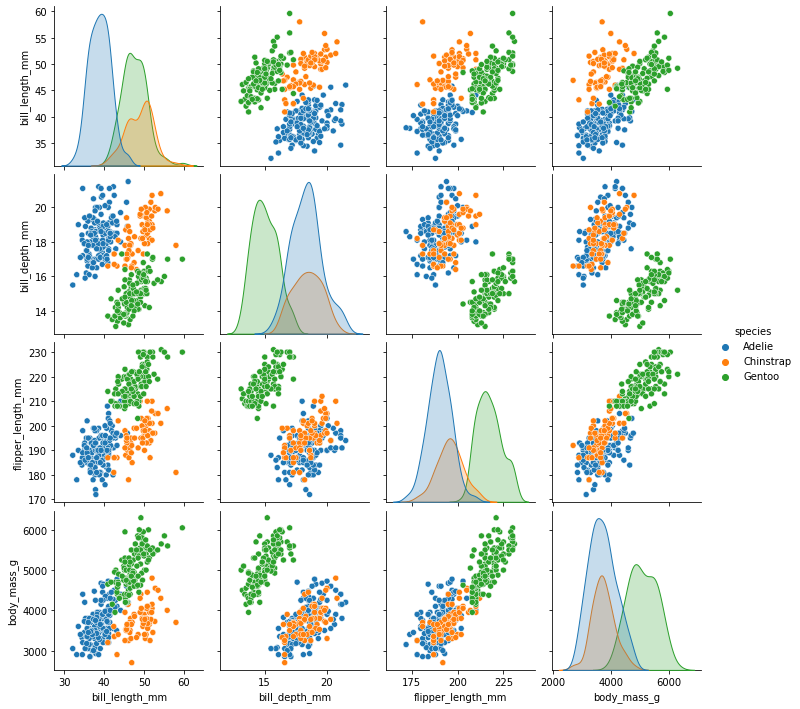

In [7]:
sns.pairplot(data=penguins, hue="species")

Notice that penguins from the same species have similar physical measurements, and so group together (*cluster*) in the scatter plots.  In some graphs the groups for two different species overlap, but in other graphs we can more clearly see the three different species.

But what if we didn't already know which penguins belonged to which species (or even that there are 3 species of penguins in the data).  Could the computer figure this out?

### Section 2: K-Means clustering

A *clustering* algorithm is a program in which the computer tries to divide the data into a predetermined number of groups, such that data points in a group are more closely related to the other data points in that group than to data points in another group. Usually the Euclidean distance between the features or independent variables (x) is used to measure closeness, as in the K-Nearest Neighbors algorithm.

Let's try clustering the penguin data using the k-means clustering algorithm in the scikit-learn package.

First, create a new DataFrame `x` containing only the quantitative columns (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`).

In [24]:
x = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

Next create a KMeans object, which is a variable storing information about this clustering process (similar to how we created k-nearest neighbors variables, decision tree variables, etc. in the previous labs). 

The parameter `n_clusters = 3` tells the function that we want to look for 3 clusters, or groups.

In [9]:
kmeans = KMeans(n_clusters=3)

Next we fit the data to the model.  Because clustering is an unsupervised method, we do not use a `y` variable.

In [10]:
kmeans.fit(x)

KMeans(n_clusters=3)

Now we predict which cluster each data point will be in according to our model, and store this in the variable `clusters`.

In [11]:
clusters = kmeans.predict(x)

Display the variable `clusters`.

In [12]:
clusters

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,

How many different numbers are there?  What do you think these numbers represent?

### Section 3: Evaluating the clusters

How well did the clustering algorithm work?

One way to evaluate it is visually, by coloring the data points on our scatter plots by the clusters found by the algorith, not by the actual species.

We can do this by creating a new column in our DataFrame `penguins` called `clusters` with the clusters found in the last section.

In [13]:
penguins['clusters'] = clusters

<details><summary>Answer:</summary>
    <code>
    penguins["clusters"] = clusters
    </code>
</details>

Again plot the scatterplots between all pairs of quantitative variables, but this time color the points by the cluster.

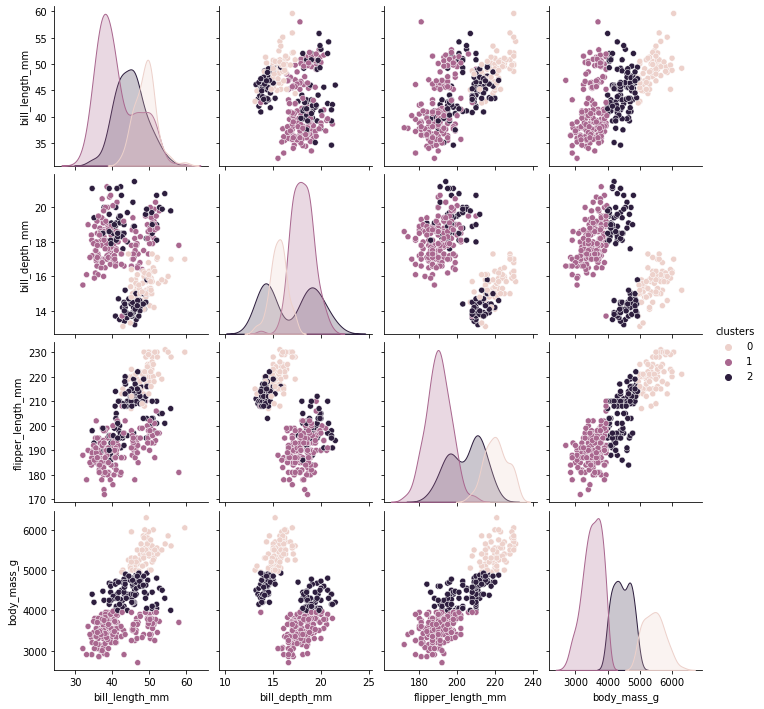

In [15]:
sns.pairplot(data=penguins, hue="clusters")

Compare these plots to the first set of scatterplots that are colored by the actual species.  Did the k-means clustering algorithm do a good job?  Why or why not?

A second method to evaluate how well the clustering worked is with a confusion matrix.  We first have to map the cluster numbers to the species.  We can do this with the `map` function from Lab 4.

In [16]:
cluster_map = {"0":"Adelie", "1":"Chinstrap", "2":"Gentoo"}
penguins["mapped_clusters"] = penguins["clusters"].apply(str).map(cluster_map)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,clusters,mapped_clusters
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1,Chinstrap
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1,Chinstrap
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1,Chinstrap
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1,Chinstrap
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1,Chinstrap


Notice that we have an extra function `apply(str)`, which is needed to change the `clusters` function from type `int` to string before applying the map.  However, by doing the type change as we apply the map, we did not change the type of the `clusters` column permanently.

We'll now create the confusion matrix using the scikit learn function from previous lab.  Can you figure out how to do it?  The true values (the `species` column) should be the first parameter.

In [17]:
confusion_matrix(penguins['species'], penguins['mapped_clusters'])

array([[  0, 108,  38],
       [  0,  52,  16],
       [ 70,   1,  48]])

<details><summary>Answer:</summary>
    <code>
    confusion_matrix(penguins["species"], penguins["mapped_clusters"])
    </code>
</details>

To know for sure which row/column corresponds to which penguin species, we can pass the order into the function as a parameter:

In [20]:
confusion_matrix(penguins["species"], penguins["mapped_clusters"], labels = ["Adelie","Chinstrap","Gentoo"])

array([[  0, 108,  38],
       [  0,  52,  16],
       [ 70,   1,  48]])

Which penguin species was most likely to be grouped correctly?  Which penguin species was least likely to be grouped correctly?  Is this what you expect from the scatterplots?

### Section 4: Scaling the data

If we look at the scatterplots involving the body mass variable, we can see that the penguins were mainly divided into clusters by their body mass.  One cluster seems to be penguins with a body mass of roughly 4000 g or less, another cluster seems to be penguins with a body mass of roughly 4000-5000g, and the last cluster seems to be penguins with a body mass greater than 5000g.  We don't see a strong division like this for any of the other variables.

What's happening?  Remember in K-Nearest Neighbors that we had to scale our variables to all have values between 0 and 1, so that a large variable didn't dominate the distance calculation?  The same situation is happening here.  Because close data points are placed in the same cluster and because the body mass variable values are so much bigger than the values of the other variables, the body mass variable dominates the distance computations.  In other words, deciding whether two data points are close or not depends mainly on the two body masses.

Let's see if scaling our data gives better clustering results.  We will scale the `x` data in the same way as in Lab 13.

First create a scaler object.

In [21]:
scaler = MinMaxScaler()

<details><summary>Answer:</summary>
<code>
scaler = MinMaxScaler()
</code>
</details>

Next use the `fit_transform()` function on the `scaler` object to scale the `x` data.

In [25]:
x_scaled = scaler.fit_transform(x)

<details><summary>Answer:</summary>
<code>
x_scaled = scaler.fit_transform(x)
</code>
</details>

Create and fit a `KMeans` clustering object for 3 clusters to the scaled data.

In [27]:
kmeans_scaled = KMeans(n_clusters=3)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=3)

<details><summary>Answer:</summary>
<code>
kmeans_scaled = KMeans(n_clusters = 3)
kmeans_scaled.fit(x_scaled)</code>
</details>

Cluster the scaled x data, and store it as a new column in the `penguins` DataFrame.

In [28]:
penguins['clustered_scaled'] = kmeans_scaled.predict(x_scaled)

<details><summary>Answer:</summary>
<code>
penguins["clusters_scaled"] = kmeans_scaled.predict(x_scaled)
</code>
</details>

Are the clusters the same for the scaled and original unscaled data?

In [29]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,clusters,mapped_clusters,clustered_scaled
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1,Chinstrap,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1,Chinstrap,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1,Chinstrap,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1,Chinstrap,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1,Chinstrap,0
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,2,Gentoo,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,2,Gentoo,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0,Adelie,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0,Adelie,1


### Section 5: Evaluating the clusters with scaling

Let's evaluate the new clusters.  Plot the scatterplots for each pair of quantitative variables colored by the clusters created from the scaled data.

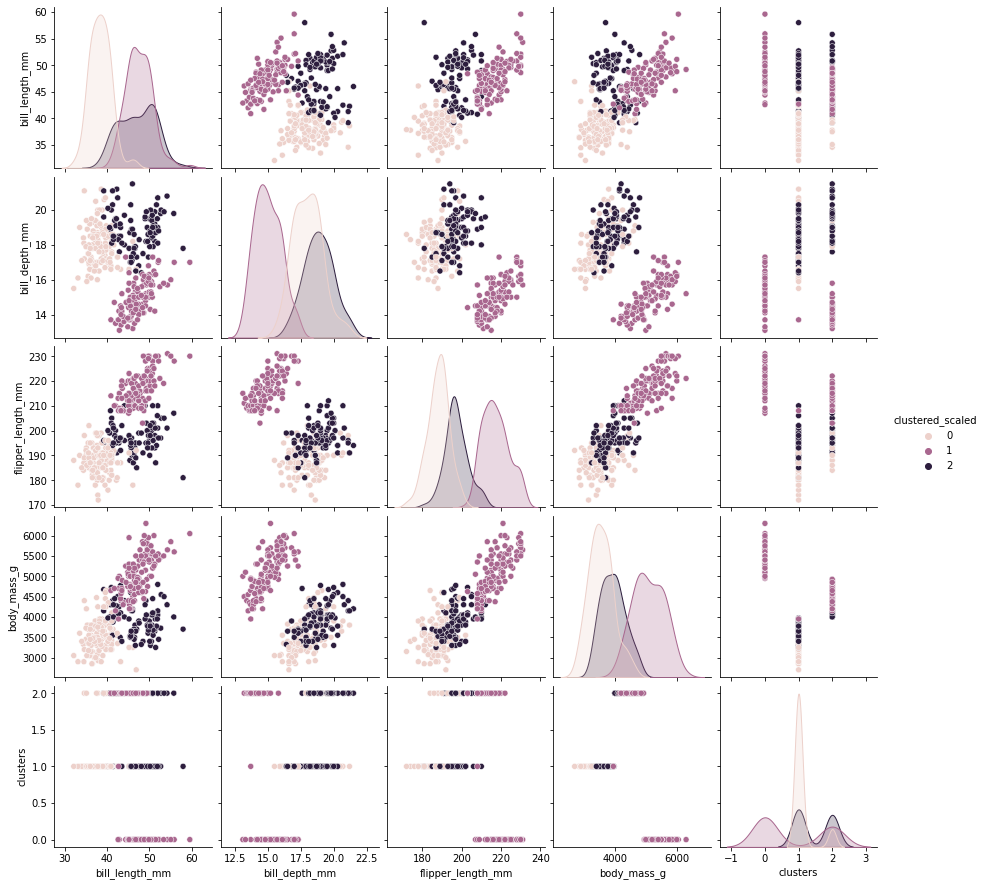

In [30]:
sns.pairplot(data=penguins, hue="clustered_scaled")

How do these scatterplots compare to the ones colored by species?

As in section 3, let's map the clusters to the species names and compute the confusion matrix.  Note that the map may be different than in section 3.

In [35]:
cluster_scaled_map = {"1":"Adelie", "2":"Chinstrap", "0":"Gentoo"}
penguins["mapped_clusters_scaled"] = penguins["clustered_scaled"].apply(str).map(cluster_scaled_map)

In [36]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,clusters,mapped_clusters,clustered_scaled,mapped_clusters_scaled
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1,Chinstrap,0,Gentoo
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1,Chinstrap,0,Gentoo
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1,Chinstrap,0,Gentoo
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1,Chinstrap,0,Gentoo
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1,Chinstrap,0,Gentoo
...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,2,Gentoo,1,Adelie
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,2,Gentoo,1,Adelie
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0,Adelie,1,Adelie
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0,Adelie,1,Adelie


In [37]:
confusion_matrix(penguins["species"], penguins["mapped_clusters_scaled"], labels = ["Adelie", "Chinstrap", "Gentoo"])

array([[  0,  29, 117],
       [  0,  60,   8],
       [119,   0,   0]])

<details><summary>Answer:</summary>
<code>
cluster_scaled_map = {"1":"Adelie", "2":"Chinstrap", "0":"Gentoo"}
penguins["mapped_clusters_scaled"] = penguins["clusters_scaled"].apply(str).map(cluster_scaled_map)

confusion_matrix(penguins["species"], penguins["mapped_clusters_scaled"], labels = ["Adelie", "Chinstrap", "Gentoo"])
</code>
</details>

How does this confusion matrix compare to the confusion matrix from clustering the unscaled data?  

Did we get better clustering results from using the scaled or unscaled data?